In [250]:
import pandas as pd


In [251]:
df = pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [252]:
from matplotlib import pyplot as plt

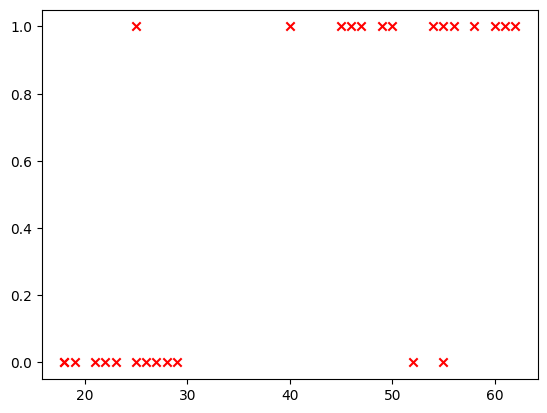

In [253]:
plt.scatter(df.age, df.bought_insurance, marker='x', c='r')

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance,test_size=0.1, random_state=2)

In [256]:
from sklearn.linear_model import LogisticRegression

In [257]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [258]:
print(model.predict(x_test))
print(x_test)

[1 0 1]
    age
25   54
0    22
9    61


In [259]:
model.score(x_test, y_test)

1.0

In [260]:
model.predict_proba(x_test)

array([[0.13020652, 0.86979348],
       [0.89599581, 0.10400419],
       [0.05810464, 0.94189536]])

# Exercise

In [261]:
hr_data = pd.read_csv('HR_comma_sep.csv')

In [262]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [263]:
left_reasons = hr_data[['satisfaction_level', 'salary', 'promotion_last_5years', 'average_montly_hours', 'left']]
left_reasons.head(60)

,satisfaction_level,salary,promotion_last_5years,average_montly_hours,left
0,0.38,low,0,157,1
1,0.80,medium,0,262,1
2,0.11,medium,0,272,1
3,0.72,low,0,223,1
4,0.37,low,0,159,1
5,0.41,low,0,153,1
6,0.10,low,0,247,1
7,0.92,low,0,259,1
8,0.89,low,0,224,1
9,0.42,low,0,142,1


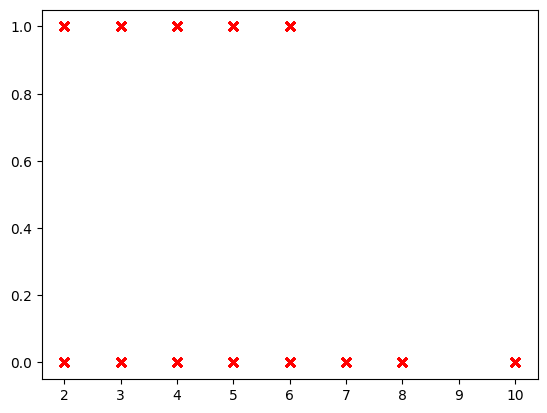

In [264]:
plt.scatter(hr_data.time_spend_company, hr_data.left, marker='x', c='r')

In [265]:
# features detected which affects the leaving of employees
# 1) Salary
# 2) Satisfaction level
# 3) Promotion last 5 year
# 4) Average Working hour

relevent_data = hr_data[['satisfaction_level', 'salary', 'promotion_last_5years', 'average_montly_hours', 'left']]
relevent_data

,satisfaction_level,salary,promotion_last_5years,average_montly_hours,left
0,0.38,low,0,157,1
1,0.80,medium,0,262,1
2,0.11,medium,0,272,1
3,0.72,low,0,223,1
4,0.37,low,0,159,1
...,...,...,...,...,...
14994,0.40,low,0,151,1
14995,0.37,low,0,160,1
14996,0.37,low,0,143,1
14997,0.11,low,0,280,1


In [266]:
# adding dummy values / One hot encoding on salary
x = relevent_data.drop("left", axis=1)
x

,satisfaction_level,salary,promotion_last_5years,average_montly_hours
0,0.38,low,0,157
1,0.80,medium,0,262
2,0.11,medium,0,272
3,0.72,low,0,223
4,0.37,low,0,159
...,...,...,...,...
14994,0.40,low,0,151
14995,0.37,low,0,160
14996,0.37,low,0,143
14997,0.11,low,0,280


In [267]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
x.salary = le.fit_transform(x.salary)
x

,satisfaction_level,salary,promotion_last_5years,average_montly_hours
0,0.38,1,0,157
1,0.80,2,0,262
2,0.11,2,0,272
3,0.72,1,0,223
4,0.37,1,0,159
...,...,...,...,...
14994,0.40,1,0,151
14995,0.37,1,0,160
14996,0.37,1,0,143
14997,0.11,1,0,280


In [268]:
x = x[['satisfaction_level', 'salary', 'promotion_last_5years', 'average_montly_hours']].values
x

array([[3.80e-01, 1.00e+00, 0.00e+00, 1.57e+02],
       [8.00e-01, 2.00e+00, 0.00e+00, 2.62e+02],
       [1.10e-01, 2.00e+00, 0.00e+00, 2.72e+02],
       ...,
       [3.70e-01, 1.00e+00, 0.00e+00, 1.43e+02],
       [1.10e-01, 1.00e+00, 0.00e+00, 2.80e+02],
       [3.70e-01, 1.00e+00, 0.00e+00, 1.58e+02]])

In [269]:
y = relevent_data.left.values
y


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [270]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('salary', OneHotEncoder(), [1])], remainder='passthrough')

In [271]:
x = ct.fit_transform(x)
x

array([[0.00e+00, 1.00e+00, 0.00e+00, 3.80e-01, 0.00e+00, 1.57e+02],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.00e-01, 0.00e+00, 2.62e+02],
       [0.00e+00, 0.00e+00, 1.00e+00, 1.10e-01, 0.00e+00, 2.72e+02],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, 3.70e-01, 0.00e+00, 1.43e+02],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.10e-01, 0.00e+00, 2.80e+02],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.70e-01, 0.00e+00, 1.58e+02]])

In [272]:
x = x[:,1:]
x

array([[1.00e+00, 0.00e+00, 3.80e-01, 0.00e+00, 1.57e+02],
       [0.00e+00, 1.00e+00, 8.00e-01, 0.00e+00, 2.62e+02],
       [0.00e+00, 1.00e+00, 1.10e-01, 0.00e+00, 2.72e+02],
       ...,
       [1.00e+00, 0.00e+00, 3.70e-01, 0.00e+00, 1.43e+02],
       [1.00e+00, 0.00e+00, 1.10e-01, 0.00e+00, 2.80e+02],
       [1.00e+00, 0.00e+00, 3.70e-01, 0.00e+00, 1.58e+02]])

In [273]:
# spliting the data to train and test
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=3)

In [274]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [275]:
model.predict(xtest)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [276]:
model.score(xtest, ytest)

0.7773333333333333